In [29]:
%load_ext autoreload
%autoreload 2
import numpy as np
import gym
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.path.dirname(os.path.abspath("__file__"))).parent))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
env = gym.make("CartPole-v0")
print("action-space:{}".format(env.action_space))
print("observation-space:{}".format(env.observation_space))
print("#observation.high")
print(env.observation_space.high)
print("#observation.low")
print(env.observation_space.low)

action-space:Discrete(2)
observation-space:Box(4,)
#observation.high
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
#observation.low
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [11]:
# state space : we divide each elements into five block
divide_num = 6
action_num = 2
observe_num = 4
state_num = divide_num ** observe_num
bin_high = env.observation_space.high
bin_low = env.observation_space.low
bins = []
for i in range(4):
    b = np.linspace(bin_low[i], bin_high[i], num=divide_num, endpoint=False)
    b = np.delete(b, 0)
    bins.append(b)

#define callable : state -> id
def get_state_id_func(state):
    sid = 0
    for i in range(observe_num):
        sid *= divide_num
        sid += np.digitize(state[i], bins[i])
    return sid

## Qlearning

In [63]:
from myML.rl.qmodel import QLearning
from myML.helper.plot import PlotHelper

In [53]:
# define model
ql = QLearning(state_num, action_num, get_state_id_func)
# make plothelper
ph = PlotHelper("output","cartpole-ql",plot_show=False)

# learning episode
MAX_EPISODE = 1200

# define function to change eps
eps_start = 0.4
eps_zero_episode = MAX_EPISODE / 3
eps_descent = eps_start / eps_zero_episode
def get_eps(episode):
    return max(eps_start - eps_descent * episode, 0.0)

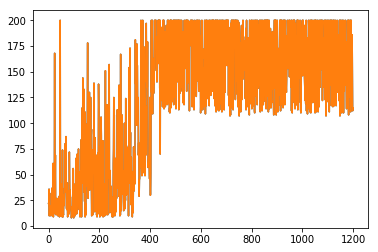

In [54]:
# start learning
for episode in range(MAX_EPISODE):
    state = env.reset()
    episode_reward = 0.0
    eps = get_eps(episode)
    
    # start one episode
    for t in range(200):
        # decie action by epsilon greedy policy
        action = ql.get_eps_greedy_action(state, eps=eps)
        
        # get the next state from the action
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        # update q value
        ql.update(state, reward, done)
        
        if done:
            ph.add_data(episode, episode_reward)
            break
ph.plot()
plt.show()

In [59]:
# solution by qlearning
for episode in range(5):
    state = env.reset()
    env.render()
    episode_reward=0.0
    
    for t in range(200):
        action = ql.get_action(state)
        state, reward, done, _ = env.step(action)
        env.render()
        episode_reward+=reward
        if done:
            print("episode={}: reward={}".format(episode,episode_reward))
            break

episode=0: reward=200.0
episode=1: reward=200.0
episode=2: reward=200.0
episode=3: reward=200.0
episode=4: reward=194.0


## Sarsa

In [69]:
from myML.rl.qmodel import Sarsa

In [70]:
# define Sarsa model
sarsa = Sarsa(state_num, action_num, get_state_id_func)

# make plothelper
ph = PlotHelper("output","cartpole-sarsa",plot_show=False)

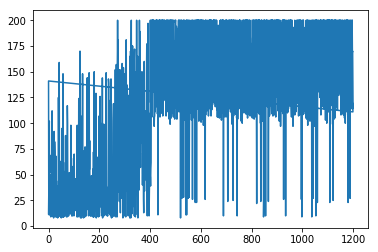

In [74]:
# start learning
for episode in range(MAX_EPISODE):
    state = env.reset()
    episode_reward = 0.0
    eps = get_eps(episode)
    
    # start one episode
    for t in range(200):
        # decie action by epsilon greedy policy
        action = sarsa.get_eps_greedy_action(state, eps=eps)
        
        # get the next state from the action
        state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        # update q value
        sarsa.update(reward, done)
        
        if done:
            ph.add_data(episode, episode_reward)
            break
ph.plot()
plt.show()

In [75]:
# solution by sarsa
for episode in range(5):
    state = env.reset()
    env.render()
    episode_reward=0.0
    
    for t in range(200):
        action = sarsa.get_action(state)
        state, reward, done, _ = env.step(action)
        env.render()
        episode_reward+=reward
        if done:
            print("episode={}: reward={}".format(episode,episode_reward))
            break

episode=0: reward=141.0
episode=1: reward=177.0
episode=2: reward=200.0
episode=3: reward=116.0
episode=4: reward=200.0
